# Sign Language Code Along - Tensorflow and OpenCV (DNN, Dropout, Hyperparameters)

This Code Along will introduces using Tensorflow with the OpenCV library for computer vision. In this code along, we will:

- Extract/Load JPEG images using OpenCV
- Design Deep Neural Network (DNN) with a dropout layer.
- Run DNN with different hyperparameter settings

## Housekeeping (Download/Install)
If you haven't already, you will need to install Tensorflow Jupyter notebook, OpenCV for Python, numpy and scikit-learn libraries, as well as Python. I recommend Python 3.

For those on Windows 10, you should install Python 3.5 (not 3.6). The Google support blogs still show people continuing to have incompatibility problems with TensorFlow and Python 3.6.

If you already have Python 3.6 loaded, try importing tensorflow first and see if the import is successfully, before deciding to downgrade to 3.5
You should also be using pip version 9. If you are using an older version, you may need to upgrade.

### Python 3.5

You can download Python 3.5 here. Goto the bottom of the page and select the download for your OS.

https://www.python.org/downloads/release/python-350/

If you are not sure which version you have, do the following:

C:> python --version

<span style='color:red; font-weight:bold'>NOTE: If you have Python 2 and 3 installed, then wherever I have python on the command line, replace with python3</span>

### PIP 

To upgrade to the latest verson of PIP (version 9 as of this writing), do the following (below is an example on Windows command prompt).

C:> python -m pip install --upgrade pip 

If you are not sure which version you have, do the following:

C:> pip --version

### Numpy and Scikit-Learn

To install the numpy and scikit-learn libraries for Python, do the following:

C:> pip install numpy, scikit-learn

### Tensorflow

You want to install Tensorflow 1.6 for your platform. Your platform is a combination of your version of python (e.g., cp35) and your OS/Architecture (e.g., cp35m-win_amd64). 

You can find the wheels (.whl) install files for Tensorflow 1.6 here:

https://pypi.python.org/pypi/tensorflow

On my laptop (Win10), I am using:

tensorflow-1.6.0rc1-cp35-cp35m-win_amd64.whl

### Jupyter Notebook

You can install Juypter Notebook as follows:

C:> python -m pip install jupyter


### OpenCV

You can install OpenCV for Python as follows:

C:> pip install opencv-python

<b style='color:red'>NOTE: Do not follow old Python 2.7 instructions (2012). You will download 750Mb and do a bunch of steps.</b>


### Putting it Together

Let's see if everything is installed correctly:

    1. Start python interpreter (REPL) on the command line
    2. Type in import tensorflow
    3. Type in import cv2
    4. There should be no errors in loading the libraries.
    
### Launch Jupyter Notebook

From a command terminal, enter:

C:> jupyter notebook

This will launch a Jupyter notebook in a web browser (whatever is your default web browser). 

#### Create a Notebook

Under the toolbar, select:

File-> New Notebook -> Python 3

A notebook will appear which will look similar to this.

#### Import Tensorflow and OpenCV

In the first input cell, we will import the tensorflow and opencv libraries to verify they are properly installed.

Python execution of the cell should complete without any errors. You may get deprecated warnings, just ignore them. Let me try it below:


In [4]:
# Importing Tensorflow
import tensorflow as tf
print( tf.__version__ )

# Importing OpenCV
import cv2
print( cv2.__version__ )

1.6.0-rc1
3.4.0


We will need a few more libraries, so let's load them now.

In [5]:
import os
import numpy as np

## Data Source

Github Public Repository - https://github.com/EvilPort2/Sign-Language

<i>"The first thing I did was, I created 10 gesture samples using OpenCV. For each gesture I captured 1200 images which were 50x50 pixels. All theses images were in grayscale which is stored in the gestures/ folder. The gestures/0/ folder contains 1200 blank images which signify "none" gesture. Also I realised that keeping this category increased my model's accuracy to 99% from a laughable 82%."</i>

Let's go to the downloaded images and see what's there. Let's first check that we are in the correct directory.

In [6]:
pwd

'C:\\Users\\User\\Desktop\\AITraining\\Portland-Data-Science-Group\\Presentations\\CodeAlong\\sign-lang'

You will see under the gestures directory, we have folders 0 through 26. Folder 0 is the none image, while folders 1 through 26 have images for the letters A..Z, respectively.

Let's look under one of the folders (i.e., folder 1 for the letter A):

<img src='gestures.jpg'/>

Let's now use openCV's method imread to read in a JPEG image and convert it to an uncompressed numpy 2D matrix of pixels.

In [7]:
image = cv2.imread("gestures/1/1.jpg", 0)

Let's verify that the image is a numpy matrix as expected. It's type should be numpy.ndarray and it's shape should be 50 x 50 pixels.

In [8]:
print( type(image) )
print( image.shape )

<class 'numpy.ndarray'>
(50, 50)


Let's now look at the contents of the image. As you can see, it is a matrix of values between 0 and 255 (uint8).

In [9]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Plotting an Image

Let's plot one of the images in the training set. To do so, we will use the plotting functions of the matplotlib package. Let's start by importing the package.

In [10]:
import matplotlib.pyplot as plt

# This line is specific to python notebooks (not python). 
# It causes plots to automatically be rendered (displayed) without issuing a show command.
%matplotlib inline  

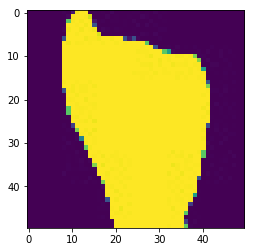

In [11]:
# Let's plot it now
plt.imshow( image )

### Loading the Dataset

The function below traverses the gestures folder for each subfolder (letter in the alphabet) and loads the images and corresponding label (letter), which is obtained from the subfolder name.

In [12]:
def load_dataset( verbose = False ):
    """ Load the Sign Language dataset for the Alphabet """
    images = []
    labels = []
    # Process each subfolder (0..26) in the gestures folder
    for subfolder in os.listdir("gestures"):
        if verbose == True: print("Loading Subfolder", subfolder)
        # There are 1200 images per letter
        for i in range(1200):
            # Read each image in
            image = cv2.imread("gestures/"+ subfolder + "/" + str(i+1) + ".jpg", 0)
            # if bad image, skip
            if np.any(image == None):
                continue
            # add image to image list
            images.append( image )
            # add corresponding label to label list
            labels.append( subfolder )
    # return the list of images and corresponding labels
    return images, labels

Let's now load the images. We will set the parameter verbose to True to see the progress since this will take awhile.

In [13]:
import time
start = time.time()
images, labels = load_dataset( True )
print( "Time to Load Images: ", time.time() - start )

Loading Subfolder 0
Loading Subfolder 1
Loading Subfolder 10
Loading Subfolder 11
Loading Subfolder 12
Loading Subfolder 13
Loading Subfolder 14
Loading Subfolder 15
Loading Subfolder 16
Loading Subfolder 17
Loading Subfolder 18
Loading Subfolder 19
Loading Subfolder 2
Loading Subfolder 20
Loading Subfolder 21
Loading Subfolder 22
Loading Subfolder 23
Loading Subfolder 24
Loading Subfolder 25
Loading Subfolder 26
Loading Subfolder 3
Loading Subfolder 4
Loading Subfolder 5
Loading Subfolder 6
Loading Subfolder 7
Loading Subfolder 8
Loading Subfolder 9
Time to Load Images:  106.8585114479065


Let's see we got what we expected. There are 27 folders (26 letters and None) with 1200 images each. We should have a list of 32,400 (27 * 1200) numpy 2D matrixes (aka the images).

In [14]:
print( len(images) )

32400


Let's now verify that the images (and labels) we read in by plotting one of the images and it's corresponding label.

y = 10


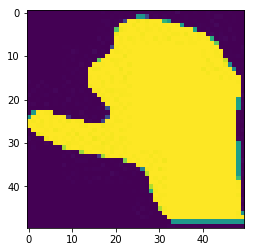

In [15]:
# Let's plot it now
index = 2407
plt.imshow( images[index] )
print ("y = " + str(labels[index]))

### Flatten the Image Data

Now we will flatten the data (reshape so all rows follow each other sequential in a single vector).

In [17]:
# Convert python list to numpy array
images_np = np.asarray(images)
print( "Images as Numpy Array:", images_np.shape )

images_flatten = images_np.reshape(images_np.shape[0], -1)
print( "Images Flatten:", images_flatten.shape )


Images as Numpy Array: (32400, 50, 50)
Images Flatten: (32400, 2500)


### Normalize the Image Data

Now we will normalize the pixel values between 0 and 1.

In [18]:
# Normalize the Pixel Values between 0 and 1
x = images_flatten / 255.0

### Categorical Conversion of Labels

Let's now convert the labels from a categorical value to a one hot encoding.

In [22]:
# Convert python list to numpy array
labels_np = np.asarray(labels)
print( "Labels as Numpy Array:", labels_np.shape )

# Let's look at the array data type
labels_np

Labels as Numpy Array: (32400,)


array(['0', '0', '0', ..., '9', '9', '9'], dtype='<U2')

That's an unsigned 64bit integer. For our purposes we need it as a signed integer. Let's change its datatype.

In [23]:
labels_int = labels_np.view('int64')
labels_int[:] = labels_np

# Let's look at the new data type
labels_int

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

Now the array shape and data type are ready. Let's do the one hot encoding.

In [25]:
def convert_labels_to_one_hot_encoding(Y, C):
    """ This function will do the reshape and conversion (from Coursera)"""
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

# Let's do the conversion
y = convert_labels_to_one_hot_encoding(labels_int, 27)

# Let's print the shape of our labels
print( y.shape )

(32400, 27)


### Split Dataset into Training and Test Data

Now that we have our data and labels ready, let's split our dataset into training and test data. For our purposes, we will use 80% as training and 20% as test. We could do the split by hand using numpy.random.shuffle() to randomize the order, and then use array slicing.

But scikit-learn has an all-in-one method for this purpose, so we will use it.

In [26]:
from sklearn.model_selection import train_test_split

# Split our data/labels into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Deep Neural Network with Dropout Layer - Softmax Activation

We are going to build a simple deep neural network (DNN) with a dropout layer. There will not be a convolutional layer. That is, we will use all 2500 pixels as input. The output layer from our neural network will be passed through a softmax activation function to produce our predictions of the letter.

In our Neural Network, we will have the following:

    - An input layer of 2500 inputs and 64 outputs
    - A linear recitifier activation function
    - A first hidden layer of 64 inputs and 32 outputs
    - A dropout layer
    - A linear recitifier activation function
    - A second hidden layer of 32 inputs and 20 outputs
    - A linear recitifier activation function
    - An output layer of 20 inputs and 27 outputs
    - A softmax activation function

INPUT LAYER => RELU => HIDDEN LAYER => DROPOUT LAYER => RELU => HIDDEN LAYER => RELU => OUTPUT LAYER => SOFTMAX

### Softmax

We will use the softmax layer to make our predictions. Each output from softmax will be a number between 0 and 1, representing a percent. That is, if the output for the node 3 is 0.8, then this means 80% prediction. We will choose the output with the highest percent when making a prediction.

Softmax is a mathematical function that takes a set of values, which may otherwise not add up to 1, and outputs a new set of numbers when totaled will add up to 1. That is, we use softmax() so that all our outputs for each image add up to 1 (100%).

Softmax will be our 'activation' function from the output layer.

## Building your first neural network in TensorFlow

### Design, then Run

#### Design

     -- Create placeholders for your input data
     -- Design the layers as a Graph
     -- Set the optimizer
     
#### Run

      -- Initialize the Graph
      -- Set number of epochs
      -- Set batch size, learning rate
      -- Run the Graph with the Training Data to Train a Model
      -- Validate the Model with Test Data


### Input Vector and Output Vector and Hyperparameter Placeholders

For our first tensorflow step, we will setup Tensorflow placeholders.

We have two placeholders we need to declare, one for the input vector (pixel image data) and one for the output vector (letter classifier).

For our input placeholder (which we call X), we have 2,500 features (pixels per image). For the output vector (which we call Y), we have have 27 classifiers (alphabet and None). In both cases, we set the second dimension of our vector to None. The None is a placeholder for the number of samples we will feed into the neural network. We also know that our data is floating point values between 0 and 1, so we will set the data type to float32.

We will declare two more placeholders for setting some hyper-parameters, the percent to keep in the dropout layer (D, and the learning rate in the optimizer (L). Since both are scalar values, we will define their shape as a single value.

In [28]:
# Let's first reset our graph, so our neural network components are all declared within the same graph
from tensorflow.python.framework import ops
ops.reset_default_graph() 

In [29]:
X = tf.placeholder(tf.float32, shape=[2500, None])
Y = tf.placeholder(tf.float32, shape=[27, None])
D = tf.placeholder(tf.float32, [])
L = tf.placeholder(tf.float32, [])

### INPUT LAYER

Let's now design our input layer. We need two things: weights and biases. 

Each input feature (pixel) will need a weight (which our model will learning during training). The weight is multipled against the value of the input (pixel), which we symbolically represent as Wx. 

Each output from the layer will need a bias (which our model will learning during training). The bias is added to the result of the weight multipled by the pixel value (Wx).

Let's create two Tensorflow variables for our weights and biases. The weights (which we call W) will need to be a 2D matrix. The rows are the number of inputs, which is 2500 and the columns the number of outputs to the hidden layer, which will be 64.

The bias will be a vector of size 64 (one for each output).

We need to initialize our weights and biases to some initial value. We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [30]:
tf.set_random_seed(1)   # Set the same seed to get the same initialization as in this demo.

# The weights for the input layer
W1 = tf.get_variable("W1", [64, 2500], initializer=tf.contrib.layers.xavier_initializer(seed=1))

# The bias for the output from the input layer
b1 = tf.get_variable("b1", [64, 1], initializer=tf.zeros_initializer())

Let's put it together into an input layer. We will use the Tensorflow method tf.matmul() to do a matrix multiplication of the weights (our variable W1) and the inputs (our placeholder X), add in the bias (b1), and pass the output through a linear activation function.

- Create a node that will multiply the weights (W1) against the input vector (X - which is our input placeholder).
- Create a node that adds the bias to the above node (W1 * X)
- Pass the outputs from the input layer through a RELU activation function

In [31]:
# The first layer (input layer)
Z1 = tf.add(tf.matmul(W1, X), b1)

# Let's add the activation function to the output signal from the first layer
A1 = tf.nn.relu(Z1)

### FIRST HIDDEN LAYER

The first hidden layer will have 64 inputs (outputs from input layer) and 32 outputs. Each input will need a weight and each output a bias (which we will train). Each output will be passed through the linear rectifier unit (RELU) activation function.

We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [32]:
W2 = tf.get_variable("W2", [32, 64], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable("b2", [32, 1], initializer=tf.zeros_initializer())

Let's construct the first hidden layer

- Create a node that will multiply the weights (W2) against the outputs of the input layer (A1).
- Create a node that adds the bias to the above node (W2 * A1)
- Pass the outputs from the (first) hidden layer through a dropout layer
- Pass the outputs from the dropout layer through a RELU activation function

In [33]:
# The second layer (first hidden layer)
Z2 = tf.add(tf.matmul(W2, A1), b2) 

# Let's add the dropout layer to the output signal from the second layer
D2 = tf.nn.dropout(Z2, keep_prob=D)

# Let's add the activation function to the output signal from the dropout layer
A2 = tf.nn.relu(D2)

### SECOND HIDDEN LAYER

The second hidden layer will have 32 inputs (outputs from first hidden layer) and 20 outputs. Each input will need a weight and each output a bias (which we will train). Each output will be passed through the linear rectifier unit (RELU) activation function.

We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [34]:
W3 = tf.get_variable("W3", [20, 32], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable("b3", [20, 1], initializer=tf.zeros_initializer())

Let's construct the second hidden layer.
- Create a node that will multiply the weights (W3) against the outputs of the first hidden layer (A2).
- Create a node that adds the bias to the above node (W3 * A2)
- Pass the outputs from the second hidden layer through a RELU activation function

In [35]:
# The third layer (second hidden layer)
Z3 = tf.add(tf.matmul(W3, A2), b3) 

# Let's add the activation function to the output signal from the third layer
A3 = tf.nn.relu(Z3)

### OUTPUT LAYER

The output layer will have 20 inputs (outputs from the second hidden layer) and 27 outputs (one for each letter and None). Each input will need a weight and each output a bias (which we will train). The 27 outputs will be passed through a softmax activation function. 

We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [36]:
W4 = tf.get_variable("W4", [27, 20], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b4 = tf.get_variable("b4", [27, 1], initializer=tf.zeros_initializer())

Let's construct the output layer.

- Create a node that will multiply the weights (W4) against the outputs of the second hidden layer (A3).
- Create a node that adds the bias to the above node (W4 * A3)
- Pass the outputs from the output layer through a SOFTMAX squashing function (done by the optimizer)

In [37]:
# The fourth layer (output layer)
Z4 = tf.add(tf.matmul(W4, A3), b4) 

## OPTIMIZER

Now its time to design our optimizer. Let's start by designing our cost function. We will use the mean value of the softmax cross entropy between the predicted labels and actual labels. This is what we want to reduce on each batch (aka the cost).

In [38]:
# to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(Z4), labels=tf.transpose(Y)))

Let's design our optimizer. This is the method that adjusts the values of the weights and biases, based on minizing the cost value during training.

We also need to set a learning rate. This is multiplied against the gradient calculation. It's used to prevent huge swings in setting weights which can result in either converging at a local (instead of global) optima, or not converging at all (infinite gradient). We will set the learning rate when we run the graph using the placeholder L.

In [55]:
# The learning rate for Gradient Descent algorithm

optimizer = tf.train.GradientDescentOptimizer(L).minimize(cost)

### Run the Graph

We've built our Tensorflow graph for training our data. So, let's start training it.

First, we need to call Tensorflow's global_variables_initializer() method to initialize the variables we've defined. We will create this as another node, which will be the first node we run (evaluate) in our graph.

In [49]:
init = tf.global_variables_initializer()

It's also a good idea to know how long your training takes, so let's import the time library.

In [50]:
import time

#### Let's set our hyperparameters.

We need to set the number of epochs (that's how many times we run the training data through the neural network), and the batch size. The batch size is a small subset of the entire training set. We will be running a batch at a time per epoch. After each batch, then the cost is computed and backpropagated through the neural network.

In [51]:
epochs = 20                                    # run a 20 epochs
batch_size = 100                               # for each epoch, train in batches of 100 images
number_of_images = x_train.shape[0]            # number of images in training data
batch_size = 200                               # size of each batch
batches = number_of_images // batch_size       # number of batches in an epoch

# Feed Dictionary Parameters
keep_prob = 0.9                                # percent of outputs to keep in dropout layer
learning_rate = 0.5                            # the learning rate for graident descent

We are going to run the graph now!

We start by creating a tensorflow session (tf.Session()). Within the session we can run (evaluate) parts of the graph we designed.

We start by initializing the tensor variables we defined for the weights and biases.

We then run our training data through our neural network for the number of epochs we defined. For each epoch, we get a randomly shuffled batch from the training data and feed the batch (i.e. feed dictionary) into the neural network by running (evaluate) the optimizer node in our graph.

Once we've trained the model, then we create some new nodes to calculate accuracy and evaluate against the training data.

In [54]:
start = time.time()

with tf.Session() as sess:
    # Initialize the variables
    sess.run(init)
       
    # run our training data through the neural network for each epoch
    for epoch in range(epochs):
        
      epoch_cost = 0
      
      # Run the training data through the neural network
      for batch in range(batches):
            
          # Calculate the start and end indices for the next batch
          begin = (batch * batch_size)
          end   = (batch * batch_size) + batch_size
            
          # Get the next sequential batch from the training data
          batch_xs, batch_ys = x_train[begin:end], y_train[begin:end]
      
          # Feed this batch through the neural network.
          _, batch_cost = sess.run([optimizer, cost], feed_dict={X: batch_xs.T, Y: batch_ys.T, D: keep_prob, L: learning_rate})
            
          epoch_cost += batch_cost
      
      print("Epoch: ", epoch, epoch_cost / batches)
        
    end = time.time()
    
    print("Training Time:", end - start)
    
    # Test the Model
    
    # Let's select the highest percent from the softmax output per image as the prediction.
    prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))
    
    # Let's create another node for calculating the accuracy
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

    # Now let's run our trainingt images through the model to calculate our accuracy during training
    # Note how we set the keep percent for the dropout rate to 1.0 (no dropout) when we are evaluating the accuracy.
    print ("Train Accuracy:", accuracy.eval({X: x_train.T, Y: y_train.T, D: 1.0}))
    
    # Now let's run our test images through the model to calculate our accuracy on the test data
    print ("Test Accuracy:", accuracy.eval({X: x_test.T, Y: y_test.T, D: 1.0}))

Epoch:  0 3.1966683790665265
Epoch:  1 2.2554031314775926
Epoch:  2 2.0474198465199436
Epoch:  3 2.357694100963977
Epoch:  4 2.0568310031595156
Epoch:  5 1.9497294758641444
Epoch:  6 1.929971507353376
Epoch:  7 1.9202116182608198
Epoch:  8 1.8825104800305625
Epoch:  9 1.844579768735309
Epoch:  10 1.8124470304149065
Epoch:  11 1.9289473285970762
Epoch:  12 1.8133748372395833
Epoch:  13 1.7922881869382636
Epoch:  14 1.7631640397301016
Epoch:  15 1.7484606282655584
Epoch:  16 1.9717839466508968
Epoch:  17 3.215636216392813
Epoch:  18 3.161638015924498
Epoch:  19 3.1577226450276927
Training Time: 34.998483419418335
Train Accuracy: 0.07534722
Test Accuracy: 0.06898148


### Evaluate the Model

The last three steps above is where our test data was ran through the model and produced how accurate our model was on the test data.

After training the model, we created a node for prediction. This node compares two vectors, our predicted labels and our actual labels. Each vector is 10 elements long with a 1 in the predicted/actual digit location. So we are comparing the vectors. If they match (prediction matches actual), then we have a TRUE; otherwise a FALSE. That's how we are going to get our accuracy percentage calculated.

Next, we create the node accuracy. This node is a cost function!

We then run the accuracy node, feeding it the test images as the X variable and the test labels as the Y variable. This will result in the test images being ran through the model (which is in memory) and the corresponding output vectors evaluated against the actual labels of the test images (Y).

### Rerun with different learning rate

Wah! We only got 3% accuracy with our learning rate at 0.5

It appears we were converging, but more likely wildly bouncing back and forth on reducing the cost of each batch. This might be an infinite gradient problem. Let's try lowering the learning are by a magnitude.

In [53]:
learning_rate = 0.05

### Rerun with different dropout

Wow, we got 99.9% accuracy! We probably won't do better. The training and test accuracy are nearly the same, so we do not have an overfitting problem. But for the fun of it, let's increase the dropout rate and see what happens.

In [46]:
keep_prob = 0.5

Not really any difference!

## You have now successful designed and run DNN with Dropout, and feeding hyperparameters.